<font color=blue><h1>The Fourier Transform</h1>

<font color=blue><h3>What is The Fourier Transform?</h3>

The Fourier Transform is a mathematical technique that allows us to take a time based pattern as an input and then can determine the rotation speed, cycle effect and strength. It's applied to waveforms, which decomposes it to a sinusoid and thus provides another way to represent a waveform. Nearly everything can be described by a waveform, a function of time or space for example. A further example of this is a sound wave. A sound wave is the pattern of disturbance caused by the movement of energy traveling and this can be represented using a Fourier Transform, which is pretty cool. The formala that represents Fourier Transform can be represented in many ways (mainly depending on what convention is being used) but it can be summarised in this formula. 

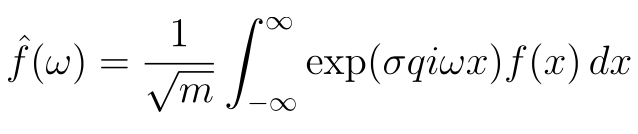

Where m is either 1 or 2π,  σ is +1 or -1, and q is 2π or 1. The way this formula summarises the different conventions of Fourier Transform 

<font color=blue><h3>Examples of different theorms integration of Fourier Transform</h3>

<h3>Shifting</h3>

By shifting the argument of a function, the Fourier Transform is rotated. The amount of rotation doesn't depend on the scaling factor but does depend on the sign convention σ and the frequency convention q. This is the formula here

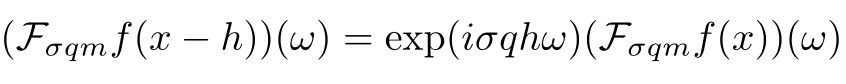

<h3>Inversion</h3>

Inversion formulas are the simplest when the frequency conventions q is 2π and the scaling factor is 1, or vice versa. F+τ1 and F-τ1 are inverses of each other, as are F+1τ and F-1τ. The other conventions involve extra factors of 2π.

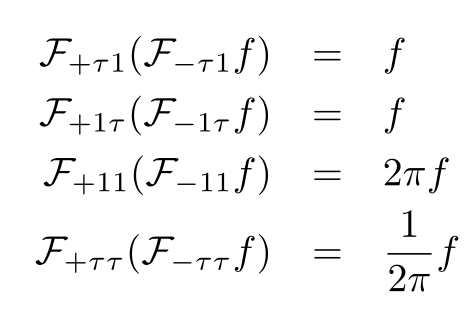

<h3>Convolution</h3>

The convolution of two functions is defined by

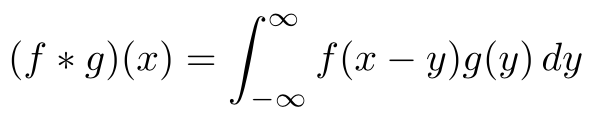

Fourier transform turns convolutions into products

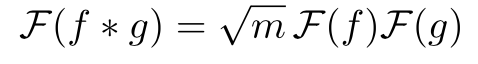

So for conventions with m = 1, the Fourier transform of the convolution is the product of the Fourier transforms. For the conventions with m = 2π there is an extra factor of √(2π).

<font color=blue><h3>Python Implementations of Fourier Transform</h3>

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sympy as smp
from skimage import color
from skimage import io
import scipy.fft as fft
import scipy

<h3>Continious time and frequency Fourier Transform</h3> 

In [2]:
t, f = smp.symbols('t,f', real = True)
k = smp.symbols('k', real=True, positive=True)
x = smp.exp(-k * t**2) * k * t
x

k*t*exp(-k*t**2)

In [3]:
from sympy.integrals.transforms import fourier_transform

In [4]:
from scipy.integrate import quad

In [5]:
#Define the function we want to take Fourier Transfrom of and 
#Function to complete Fourier Transform
def x(t,k):
    return np.exp(-k * t**2) * np.sin(k*t) * t**4
def get_x_FT(x, f, k):
    x_FT_integrand_real = lambda t: np.real(x(t,k)*np.exp(-2*np.pi*1j*f*t))
    x_FT_integrand_comp = lambda t: np.imag(x(t,k)*np.exp(-2*np.pi*1j*f*t))
    x_FT_real = quad(x_FT_integrand_real, -np.inf, np.inf)[0]
    x_FT_comp = quad(x_FT_integrand_comp, -np.inf, np.inf)[0]
    return x_FT_real + 1j*x_FT_comp

In [6]:
#Get Frequencies and fourier transform values
f = np.linspace(-4,4, 100)
x_FT = np.vectorize(get_x_FT)(x,f,k=2)

Text(0.5, 0, '$f$')

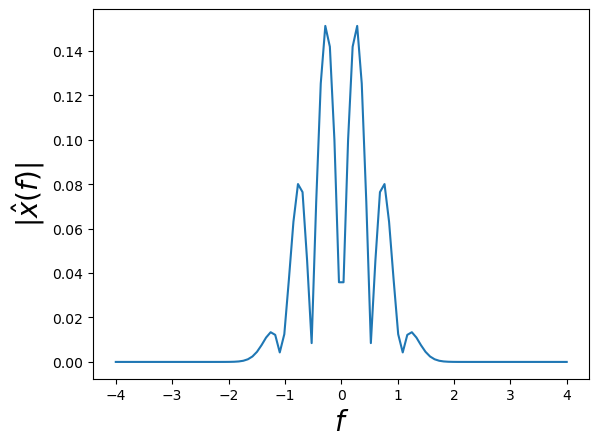

In [7]:
#Plot
plt.plot(f, np.abs(x_FT))
plt.ylabel('$|\hat{x}(f)|$', fontsize=20)
plt.xlabel('$f$', fontsize = 20)